In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Load Data 

In [8]:
charging_stations  = pd.read_csv("charging_stations_2025_world.csv")

In [9]:
country_summary  = pd.read_csv("country_summary_2025.csv")

In [10]:
ev_models  = pd.read_csv("ev_models_2025.csv")

In [11]:
world_summary  = pd.read_csv("world_summary_2025.csv")

##### Quick check of first rows


In [12]:
print("Charging Stations Data:")

print(charging_stations.head(), "\n")

Charging Stations Data:
       id                         name     city country_code state_province  \
0  307660             Av. de Tarragona  Andorra           AD            NaN   
1  301207        Parquing Costa Rodona   Encamp           AD            NaN   
2  301206                  Hotel Naudi      NaN           AD            NaN   
3  301205  Hotel Piolets Soldeu Centre      NaN           AD            NaN   
4  301204                 Hotel Serras      NaN           AD            NaN   

    latitude  longitude  ports  power_kw         power_class  is_fast_dc  
0  42.505254   1.528861     10     300.0  DC_ULTRA_(>=150kW)        True  
1  42.537213   1.727014     10      22.0   AC_HIGH_(22-49kW)       False  
2  42.576811   1.666061      1      11.0    AC_L2_(7.5-21kW)       False  
3  42.576466   1.667317      1      22.0   AC_HIGH_(22-49kW)       False  
4  42.579458   1.659215      3      11.0    AC_L2_(7.5-21kW)       False   



In [13]:
charging_stations.head()

,id,name,city,country_code,state_province,latitude,longitude,ports,power_kw,power_class,is_fast_dc
0,307660,Av. de Tarragona,Andorra,AD,NaN,42.505254,1.528861,10,300.0,DC_ULTRA_(>=150kW),True
1,301207,Parquing Costa Rodona,Encamp,AD,NaN,42.537213,1.727014,10,22.0,AC_HIGH_(22-49kW),False
2,301206,Hotel Naudi,NaN,AD,NaN,42.576811,1.666061,1,11.0,AC_L2_(7.5-21kW),False
3,301205,Hotel Piolets Soldeu Centre,NaN,AD,NaN,42.576466,1.667317,1,22.0,AC_HIGH_(22-49kW),False
4,301204,Hotel Serras,NaN,AD,NaN,42.579458,1.659215,3,11.0,AC_L2_(7.5-21kW),False


## Charging_Stations

#### Check missing values

In [14]:
print("Charging Stations:\n", charging_stations.isnull().sum(), "\n")


Charging Stations:
 id                    0
name                  0
city              22189
country_code          1
state_province    69998
latitude              0
longitude             0
ports                 0
power_kw           4660
power_class           0
is_fast_dc            0
dtype: int64 



In [15]:
charging_stations.isnull()

,id,name,city,country_code,state_province,latitude,longitude,ports,power_kw,power_class,is_fast_dc
0,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False
2,False,False,True,False,True,False,False,False,False,False,False
3,False,False,True,False,True,False,False,False,False,False,False
4,False,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
242412,False,False,False,False,False,False,False,False,False,False,False
242413,False,False,False,False,False,False,False,False,False,False,False
242414,False,False,False,False,True,False,False,False,True,False,False
242415,False,False,False,False,False,False,False,False,True,False,False


####  Handling Missing Values

#####  Fill city and state_province missing values instead of dropping


In [16]:
charging_stations['city'].fillna("unknown City",inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3120\3142846091.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  charging_stations['city'].fillna("unknown City",inplace=True)


In [17]:
charging_stations['state_province'].fillna("Unknown State",inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3120\274613762.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  charging_stations['state_province'].fillna("Unknown State",inplace=True)


##### country_code -> fill with mode


In [18]:
charging_stations["country_code"].fillna(charging_stations['country_code'].mode()[0],inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3120\2213195890.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  charging_stations["country_code"].fillna(charging_stations['country_code'].mode()[0],inplace=True)


##### power_kw -> fill with median


In [19]:
charging_stations["power_kw"].fillna(charging_stations['power_kw'].median(),inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3120\801585435.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  charging_stations["power_kw"].fillna(charging_stations['power_kw'].median(),inplace=True)


In [20]:
charging_stations['state_province'] = charging_stations['state_province'].fillna("Unknown State")


In [21]:
# Check again
charging_stations.isnull().sum()


id                0
name              0
city              0
country_code      0
state_province    0
latitude          0
longitude         0
ports             0
power_kw          0
power_class       0
is_fast_dc        0
dtype: int64

In [22]:
charging_stations['power_kw'].fillna(charging_stations['power_kw'].median(), inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_3120\189500374.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  charging_stations['power_kw'].fillna(charging_stations['power_kw'].median(), inplace=True)


### Check duplicates


In [23]:
charging_stations.duplicated().sum()

np.int64(0)

### Check data types


In [24]:
charging_stations.dtypes

id                  int64
name               object
city               object
country_code       object
state_province     object
latitude          float64
longitude         float64
ports               int64
power_kw          float64
power_class        object
is_fast_dc           bool
dtype: object

In [25]:
charging_stations.head()

,id,name,city,country_code,state_province,latitude,longitude,ports,power_kw,power_class,is_fast_dc
0,307660,Av. de Tarragona,Andorra,AD,Unknown State,42.505254,1.528861,10,300.0,DC_ULTRA_(>=150kW),True
1,301207,Parquing Costa Rodona,Encamp,AD,Unknown State,42.537213,1.727014,10,22.0,AC_HIGH_(22-49kW),False
2,301206,Hotel Naudi,unknown City,AD,Unknown State,42.576811,1.666061,1,11.0,AC_L2_(7.5-21kW),False
3,301205,Hotel Piolets Soldeu Centre,unknown City,AD,Unknown State,42.576466,1.667317,1,22.0,AC_HIGH_(22-49kW),False
4,301204,Hotel Serras,unknown City,AD,Unknown State,42.579458,1.659215,3,11.0,AC_L2_(7.5-21kW),False


## country_summary

In [26]:
country_summary.head()

,country_code,stations
0,US,82138
1,GB,26825
2,DE,23373
3,ES,17825
4,CA,16490


#### Check null values 

In [27]:
country_summary.isnull().sum()

country_code    1
stations        0
dtype: int64

In [22]:
# fill all columns by mode
for col in country_summary.columns:
    country_summary[col] = country_summary[col].fillna(country_summary[col].mode()[0])

# check again missing values
print(country_summary.isnull().sum())


country_code    0
stations        0
dtype: int64


#### check suplicates

In [28]:
country_summary.duplicated

<bound method DataFrame.duplicated of     country_code  stations
0             US     82138
1             GB     26825
2             DE     23373
3             ES     17825
4             CA     16490
..           ...       ...
117           UZ         1
118           MM         1
119           GT         1
120           KG         1
121           LC         1

[122 rows x 2 columns]>

In [29]:
country_summary.duplicated().sum()

np.int64(0)

#### check datatypes

In [30]:
country_summary.dtypes

country_code    object
stations         int64
dtype: object

## ev_models

In [31]:
ev_models.head()

,make,model,market_regions,powertrain,first_year,body_style,origin_country
0,Tesla,Model S,Global (US/EU/UK/ME),BEV,2012,Sedan,US
1,Tesla,Model 3,Global (US/EU/UK/ME/CN),BEV,2017,Sedan,US
2,Tesla,Model X,Global (US/EU/UK/ME),BEV,2015,SUV,US
3,Tesla,Model Y,Global (US/EU/UK/ME/CN),BEV,2020,SUV,US
4,Tesla,Cybertruck,US (limited),BEV,2023,Pickup,US


#### check null values

In [32]:
ev_models.isnull()

,make,model,market_regions,powertrain,first_year,body_style,origin_country
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
58,False,False,False,False,False,False,False
59,False,False,False,False,False,False,False
60,False,False,False,False,False,False,False
61,False,False,False,False,False,False,False


In [33]:
ev_models.isnull().sum()

make              0
model             0
market_regions    0
powertrain        5
first_year        0
body_style        0
origin_country    0
dtype: int64

In [34]:
ev_models["powertrain"].fillna(ev_models['powertrain'].mode()[0],inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3120\93370138.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ev_models["powertrain"].fillna(ev_models['powertrain'].mode()[0],inplace=True)


In [35]:
ev_models.isnull().sum()

make              0
model             0
market_regions    0
powertrain        0
first_year        0
body_style        0
origin_country    0
dtype: int64

### check duplicate values 

In [36]:
ev_models.duplicated

<bound method DataFrame.duplicated of      make       model           market_regions powertrain  first_year  \
0   Tesla     Model S     Global (US/EU/UK/ME)        BEV        2012   
1   Tesla     Model 3  Global (US/EU/UK/ME/CN)        BEV        2017   
2   Tesla     Model X     Global (US/EU/UK/ME)        BEV        2015   
3   Tesla     Model Y  Global (US/EU/UK/ME/CN)        BEV        2020   
4   Tesla  Cybertruck             US (limited)        BEV        2023   
..    ...         ...                      ...        ...         ...   
58    NIO         ET7           CN/EU (select)        BEV        2021   
59    NIO         ES6           CN/EU (select)        BEV        2019   
60  XPeng          P7           CN/EU (select)        BEV        2019   
61  XPeng          G9           CN/EU (select)        BEV        2022   
62  Smart          #1                 EU/UK/CN        BEV        2022   

   body_style origin_country  
0       Sedan             US  
1       Sedan          

In [37]:
ev_models.duplicated().sum()

np.int64(0)

### check data types 

In [38]:
ev_models.dtypes

make              object
model             object
market_regions    object
powertrain        object
first_year         int64
body_style        object
origin_country    object
dtype: object

### world_summary

In [39]:
world_summary.head()

,country_code,country,count,max_power_kw_max
0,US,United States,83821,600.0
1,GB,United Kingdom,27437,560.0
2,DE,Germany,24465,400.0
3,CA,Canada,18203,400.0
4,ES,Spain,17864,1000.0


#### check null values

In [40]:
world_summary.isnull()

,country_code,country,count,max_power_kw_max
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
117,False,False,False,False
118,False,False,False,True
119,False,False,False,False
120,False,False,False,False


In [41]:
world_summary.isnull().sum()

country_code        1
country             0
count               0
max_power_kw_max    4
dtype: int64

In [42]:
world_summary['country_code'].fillna(world_summary['country_code'].mode()[0], inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_3120\2449287545.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  world_summary['country_code'].fillna(world_summary['country_code'].mode()[0], inplace=True)


In [43]:
world_summary.isnull().sum()

country_code        0
country             0
count               0
max_power_kw_max    4
dtype: int64

In [44]:
world_summary['max_power_kw_max'].fillna(world_summary['max_power_kw_max'].median(), inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_3120\2600364358.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  world_summary['max_power_kw_max'].fillna(world_summary['max_power_kw_max'].median(), inplace=True)


### check duplicates 

In [45]:
world_summary.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
117    False
118    False
119    False
120    False
121    False
Length: 122, dtype: bool

In [46]:
world_summary.duplicated().sum()

np.int64(0)

#### check data types

In [47]:
world_summary.dtypes

country_code         object
country              object
count                 int64
max_power_kw_max    float64
dtype: object

In [48]:
print("Charging Stations Shape:", charging_stations.shape)
print("Country Summary Shape:", country_summary.shape)
print("EV Models Shape:", ev_models.shape)
print("World Summary Shape:", world_summary.shape)

print("\nCharging Stations Columns:", charging_stations.columns.tolist())
print("Country Summary Columns:", country_summary.columns.tolist())
print("EV Models Columns:", ev_models.columns.tolist())
print("World Summary Columns:", world_summary.columns.tolist())


Charging Stations Shape: (242417, 11)
Country Summary Shape: (122, 2)
EV Models Shape: (63, 7)
World Summary Shape: (122, 4)

Charging Stations Columns: ['id', 'name', 'city', 'country_code', 'state_province', 'latitude', 'longitude', 'ports', 'power_kw', 'power_class', 'is_fast_dc']
Country Summary Columns: ['country_code', 'stations']
EV Models Columns: ['make', 'model', 'market_regions', 'powertrain', 'first_year', 'body_style', 'origin_country']
World Summary Columns: ['country_code', 'country', 'count', 'max_power_kw_max']


In [49]:
# Charging stations summary
print("Charging Stations Summary:\n", charging_stations.describe())

# EV Models summary (include all for object + int columns)
print("\nEV Models Summary:\n", ev_models.describe(include='all'))

# World summary
print("\nWorld Summary:\n", world_summary.describe())


Charging Stations Summary:
                   id       latitude      longitude          ports  \
count  242417.000000  242417.000000  242417.000000  242417.000000   
mean   204039.926519      43.253894     -32.074160       1.959277   
std    101789.186799      12.692335      57.652645       3.931007   
min      2389.000000     -55.811599    -164.848855      -4.000000   
25%    122882.000000      38.859333     -81.644018       1.000000   
50%    208085.000000      44.414623      -2.867264       1.000000   
75%    280795.000000      51.413890       7.883693       2.000000   
max    460650.000000      81.736061     178.369254     503.000000   

             power_kw  
count   242417.000000  
mean        34.787504  
std       2031.745773  
min          0.000000  
25%          3.700000  
50%         11.000000  
75%         22.000000  
max    1000000.000000  

EV Models Summary:
          make    model market_regions powertrain   first_year body_style  \
count      63       63             63

##### 1. Charging Stations – Power Distribution

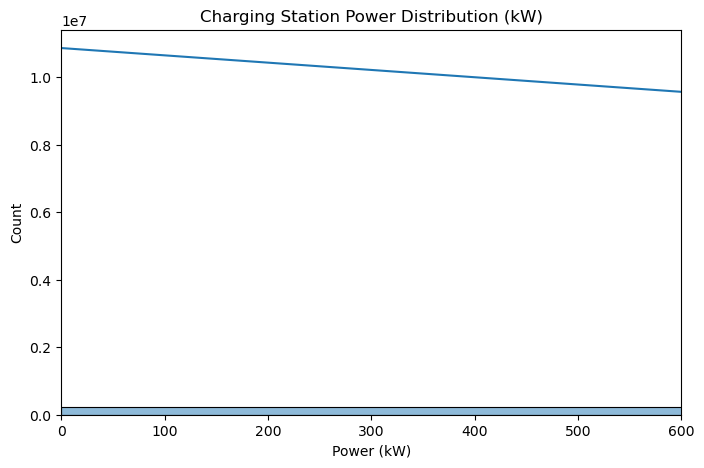

In [51]:
plt.figure(figsize=(8,5))
sns.histplot(charging_stations['power_kw'], bins=50, kde=True)
plt.xlim(0, 600)   # becouse outliers of 1000+ is unrealistic 
plt.title("Charging Station Power Distribution (kW)")
plt.xlabel("Power (kW)")
plt.ylabel("Count")
plt.show()


In [ ]:
The global EV charging network is still heavily dependent on slow AC chargers.

Fast and ultra-fast chargers are limited, but gradually increasing.

Outliers suggest either experimental hubs or data entry anomalies.

##### 2. Charging Stations – Number of Ports

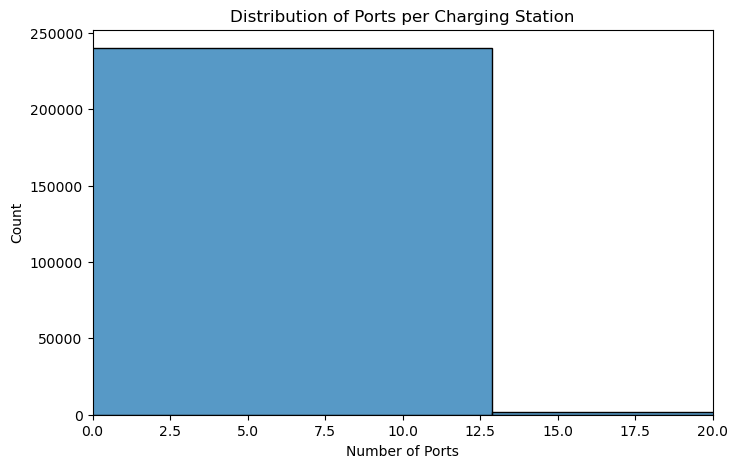

In [52]:
plt.figure(figsize=(8,5))
sns.histplot(charging_stations['ports'], bins=30, kde=False)
plt.xlim(0, 20)   # set limit for remove outliers 
plt.title("Distribution of Ports per Charging Station")
plt.xlabel("Number of Ports")
plt.ylabel("Count")
plt.show()


In [ ]:
Most charging stations worldwide are small, single-vehicle setups.

Multi-port hubs (5+ ports) are rare, showing that large-scale charging infrastructure is still developing.

The global EV charging ecosystem is fragmented, with very few high-capacity stations.

##### 3. EV Models – Launch Year Distribution

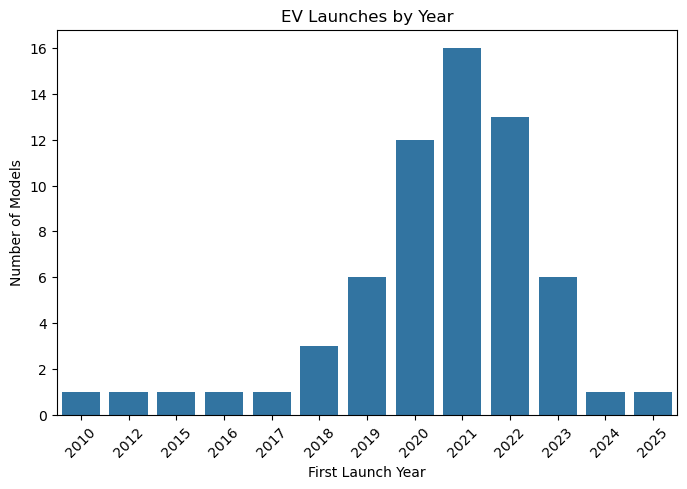

In [53]:
plt.figure(figsize=(8,5))
sns.countplot(data=ev_models, x='first_year', order=sorted(ev_models['first_year'].unique()))
plt.xticks(rotation=45)
plt.title("EV Launches by Year")
plt.xlabel("First Launch Year")
plt.ylabel("Number of Models")
plt.show()


##### 4. EV Models – Body Style Distribution

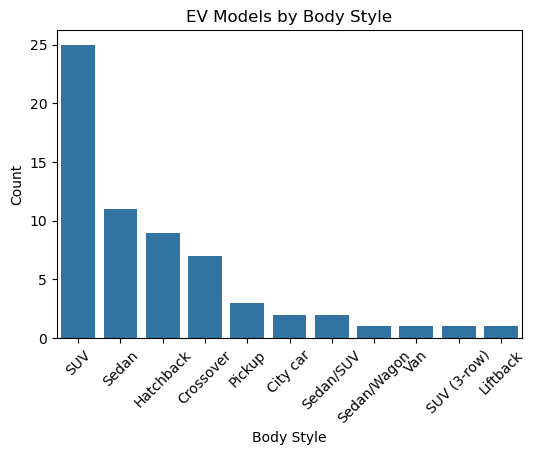

In [54]:
plt.figure(figsize=(6,4))
sns.countplot(data=ev_models, x='body_style', order=ev_models['body_style'].value_counts().index)
plt.xticks(rotation=45)
plt.title("EV Models by Body Style")
plt.xlabel("Body Style")
plt.ylabel("Count")
plt.show()


#### Step 3 – Relationships & Comparisons

##### 3.1 Charging Stations – Power Class vs Fast DC

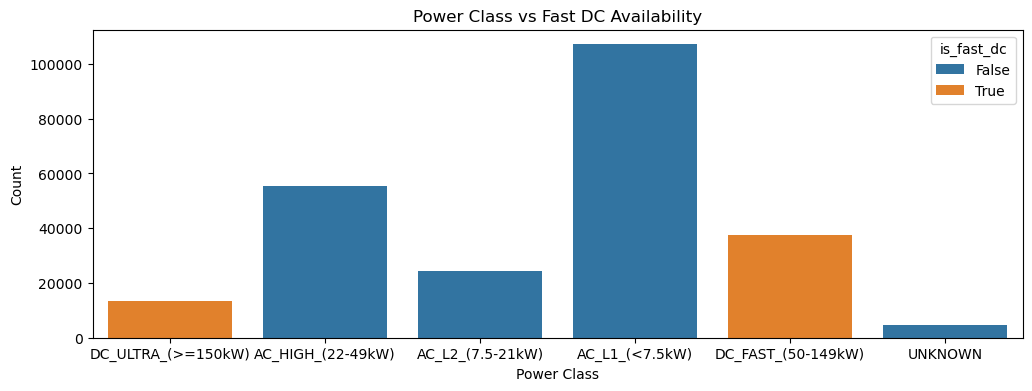

In [55]:
plt.figure(figsize=(12,4))
sns.countplot(data=charging_stations, x='power_class', hue='is_fast_dc')
plt.title("Power Class vs Fast DC Availability")
plt.xlabel("Power Class")
plt.ylabel("Count")
plt.show()


##### 3.3 EV Models – Body Style vs Powertrain

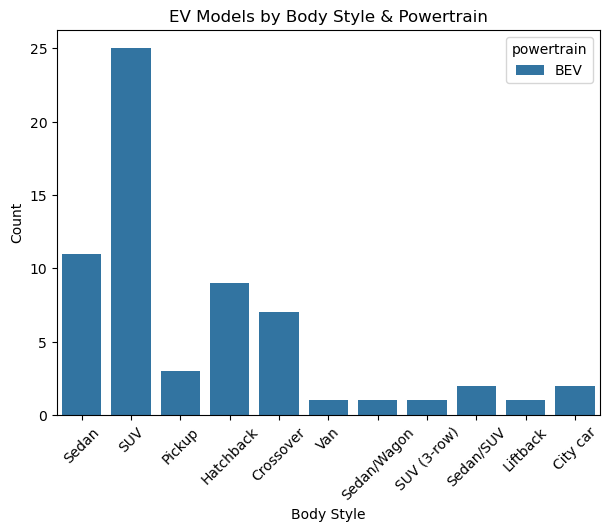

In [56]:
plt.figure(figsize=(7,5))
sns.countplot(data=ev_models, x='body_style', hue='powertrain')
plt.xticks(rotation=45)
plt.title("EV Models by Body Style & Powertrain")
plt.xlabel("Body Style")
plt.ylabel("Count")
plt.show()


##### 3.4 World – Max Power vs Count (Top 20 Countries)

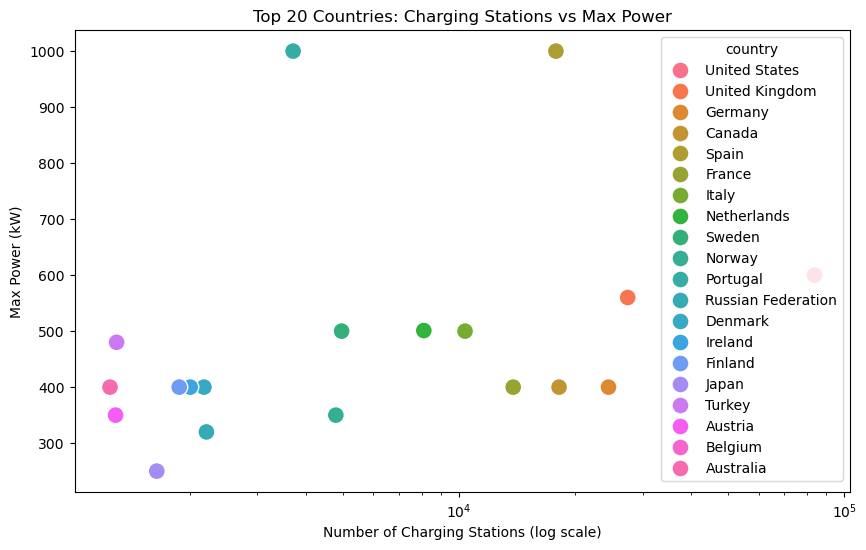

In [57]:
plt.figure(figsize=(10,6))
top20 = world_summary.sort_values('count', ascending=False).head(20)
sns.scatterplot(data=top20, x='count', y='max_power_kw_max', hue='country', s=150)
plt.xscale('log')
plt.title("Top 20 Countries: Charging Stations vs Max Power")
plt.xlabel("Number of Charging Stations (log scale)")
plt.ylabel("Max Power (kW)")
plt.show()


The scatter plot shows that countries with more charging stations 
(like the U.S. and China) also have diverse power levels. 
Some countries focus on higher max power even with fewer stations, balancing quantity vs. charging speed.

#### In this project, we analyzed the global EV ecosystem by focusing on:

1. Charging Stations – their power distribution, number of ports, and fast vs. slow charging availability.

2. EV Models – launch year trends, showing how EV adoption has accelerated in recent years.

3. Country & World Summary – comparing countries by charging station count and max charging power.